In [125]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [3]:
df =  pd.read_csv('10.csv')
df

,Unnamed: 0,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5)
0,0,1.0,Course_1,Office Tools,21.0,4217.0,50.646827,Coursera,38.797425,4.811252
1,1,2.0,Course_2,Office Tools,57.0,4238.0,82.240240,edX,160.650991,3.829329
2,2,3.0,Course_3,Technology,52.0,2700.0,55.729028,LinkedIn Learning,123.503781,4.851950
3,3,NaN,Course_4,Office Tools,69.0,4308.0,58.664729,LinkedIn Learning,116.775704,3.913732
4,4,5.0,Course_5,Technology,43.0,4792.0,62.598147,Udemy,96.246696,4.921968
...,...,...,...,...,...,...,...,...,...,...
9995,9995,NaN,Course_9996,AI,87.0,482.0,55.407463,Udemy,155.965331,4.155649
9996,9996,9997.0,Course_9997,Data Science,96.0,2029.0,93.093483,Coursera,151.022434,4.037755
9997,9997,9998.0,Course_9998,AI,25.0,136.0,90.279510,LinkedIn Learning,101.155089,3.603868
9998,9998,9999.0,Course_9999,NaN,46.0,3258.0,73.720149,edX,101.143232,3.825781


## Ma'lumotlarni birlamchi analizi

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10000 non-null  int64  
 1   Course_ID            9815 non-null   float64
 2   Course_Name          9781 non-null   object 
 3   Category             9863 non-null   object 
 4   Duration (hours)     9866 non-null   float64
 5   Enrolled_Students    9984 non-null   float64
 6   Completion_Rate (%)  9959 non-null   float64
 7   Platform             9770 non-null   object 
 8   Price ($)            9917 non-null   float64
 9   Rating (out of 5)    9757 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 781.4+ KB


In [5]:
df.describe()

,Unnamed: 0,Course_ID,Duration (hours),Enrolled_Students,Completion_Rate (%),Price ($),Rating (out of 5)
count,10000.00000,9815.000000,9866.000000,9984.000000,9959.000000,9917.000000,9757.000000
mean,4999.50000,4998.964850,55.211433,2530.633413,75.116881,106.286743,3.993805
std,2886.89568,2886.485679,26.208043,1424.351030,14.458923,55.117581,0.575304
min,0.00000,1.000000,10.000000,101.000000,50.008183,10.037145,3.000026
25%,2499.75000,2500.500000,33.000000,1288.750000,62.622241,58.510372,3.489705
50%,4999.50000,5001.000000,55.000000,2532.500000,75.153383,107.702624,4.002998
75%,7499.25000,7495.500000,78.000000,3764.250000,87.588326,153.885999,4.482225
max,9999.00000,10000.000000,100.000000,5000.000000,99.994300,199.962412,4.999176


In [6]:
df['Category'].unique()

array(['Office Tools', 'Technology', 'Finance', 'Marketing', 'Design',
       'Programming', 'Data Science', 'Business', 'AI', nan], dtype=object)

In [8]:
df[['Course_ID', 'Course_Name']].head(50)

,Course_ID,Course_Name
0,1.0,Course_1
1,2.0,Course_2
2,3.0,Course_3
3,NaN,Course_4
4,5.0,Course_5
5,6.0,NaN
6,7.0,Course_7
7,8.0,Course_8
8,9.0,Course_9
9,NaN,Course_10


## Filling course name

In [19]:
course_id = df["Course_Name"].to_list()
for i in range(len(course_id)):
    if course_id[i] != str:
        course_id[i] = f'Course_{i+1}'

df['Course_Name_full'] = course_id
df.head(20)

,Unnamed: 0,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5),Course_Name_full
0,0,1.0,Course_1,Office Tools,21.0,4217.0,50.646827,Coursera,38.797425,4.811252,Course_1
1,1,2.0,Course_2,Office Tools,57.0,4238.0,82.240240,edX,160.650991,3.829329,Course_2
2,2,3.0,Course_3,Technology,52.0,2700.0,55.729028,LinkedIn Learning,123.503781,4.851950,Course_3
3,3,NaN,Course_4,Office Tools,69.0,4308.0,58.664729,LinkedIn Learning,116.775704,3.913732,Course_4
4,4,5.0,Course_5,Technology,43.0,4792.0,62.598147,Udemy,96.246696,4.921968,Course_5
5,5,6.0,NaN,Finance,66.0,3792.0,96.671900,edX,127.509920,3.252283,Course_6
6,6,7.0,Course_7,Marketing,29.0,2607.0,71.830441,Coursera,155.541117,4.101807,Course_7
7,7,8.0,Course_8,Design,21.0,964.0,99.076272,edX,79.940944,3.088730,Course_8
8,8,9.0,Course_9,Programming,57.0,1246.0,78.817622,LinkedIn Learning,174.677480,4.498471,Course_9
9,9,NaN,Course_10,Design,59.0,489.0,58.896068,edX,82.094819,3.341868,Course_10


## Ma'lumotlar analizi

In [20]:
df["Category"].mode()

0    Business
Name: Category, dtype: object

<Axes: xlabel='Category', ylabel='count'>

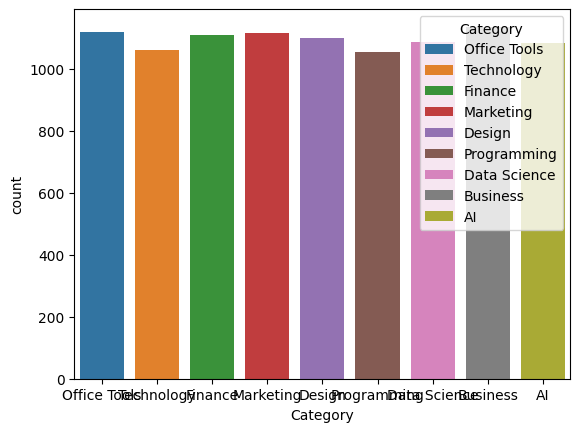

In [22]:
sns.countplot(data=df, x="Category", hue="Category")

<Axes: xlabel='Category', ylabel='Duration (hours)'>

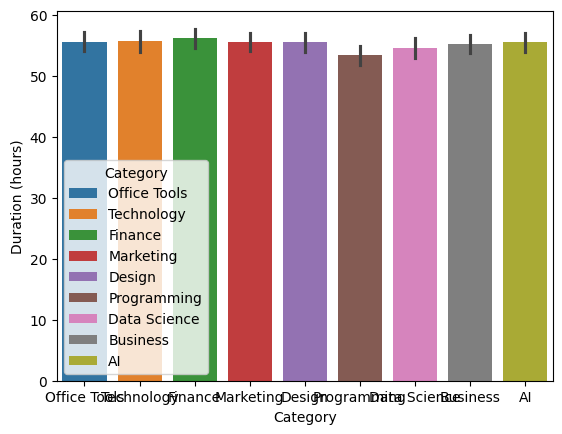

In [23]:
sns.barplot(data=df, x="Category", y="Duration (hours)", hue="Category")

In [26]:
df.groupby(["Category", "Platform"])[["Duration (hours)", "Enrolled_Students", "Completion_Rate (%)", "Price ($)"]].mean()

Duration (hours)  Enrolled_Students  \
Category     Platform                                                 
AI           Coursera                  56.189922        2588.629344   
             LinkedIn Learning         55.895307        2648.064286   
             Udemy                     56.103175        2545.237154   
             edX                       54.731061        2413.444444   
Business     Coursera                  53.729927        2398.382143   
             LinkedIn Learning         56.313793        2357.079310   
             Udemy                     54.793706        2624.962199   
             edX                       56.785124        2538.223140   
Data Science Coursera                  55.043103        2518.487179   
             LinkedIn Learning         54.810036        2471.371025   
             Udemy                     55.125926        2586.288321   
             edX                       53.924528        2422.540741   
Design       Coursera                  56.977273        2503.514925   
             LinkedIn Learning         54.712446        2598.042194   
             Udemy                     56.948454        2468.865772   
             edX                       53.412639        2487.588889   
Finance      Coursera                  53.892193        2548.018182   
             LinkedIn Learning         57.604938        2530.882591   
             Udemy                     54.226277        2601.093863   
             edX                       57.890071        2594.838596   
Marketing    Coursera                  54.863813        2603.165385   
             LinkedIn Learning         54.207018        2642.904437   
             Udemy                     57.119565        2639.885714   
             edX                       56.298450        2604.629344   
Office Tools Coursera                  53.139373        2534.062069   
             LinkedIn Learning         59.314815        2641.774908   
             Udemy                     54.845588        2652.503650   
             edX                       53.873984        2405.040000   
Programming  Coursera                  53.378277        2461.899254   
             LinkedIn Learning         52.987288        2478.109705   
             Udemy                     52.803922        2454.160156   
             edX                       54.583012        2634.552632   
Technology   Coursera                  54.020408        2574.605691   
             LinkedIn Learning         58.598485        2443.078947   
             Udemy                     56.246032        2557.656371   
             edX                       54.287879        2591.874525   

                                Completion_Rate (%)   Price ($)  
Category     Platform                                            
AI           Coursera                     73.705074  108.116505  
             LinkedIn Learning            75.274015  104.030738  
             Udemy                        74.179664  109.540289  
             edX                          76.681994   99.992241  
Business     Coursera                     73.455113  102.967911  
             LinkedIn Learning            74.193032  102.786118  
             Udemy                        76.204148  106.332249  
             edX                          75.705612   96.329745  
Data Science Coursera                     74.767231  115.192663  
             LinkedIn Learning            75.336701  104.794294  
             Udemy                        76.157365  113.624648  
             edX                          74.736884  109.010195  
Design       Coursera                     74.063068  103.797050  
             LinkedIn Learning            75.372506  110.717334  
             Udemy                        75.525469  108.903341  
             edX                          76.762427  104.180465  
Finance      Coursera                     74.891729  108.480891  
             LinkedIn Learning            75.209119  104.769408  
             

In [27]:
df.groupby(["Category"])[["Duration (hours)", "Enrolled_Students", "Completion_Rate (%)", "Price ($)"]].mean()


,Duration (hours),Enrolled_Students,Completion_Rate (%),Price ($)
Category,,,,
AI,55.471028,2547.147086,74.985863,105.240809
Business,55.229742,2481.420635,74.933706,102.314910
Data Science,54.535948,2487.918969,75.283959,110.017191
Design,55.515264,2506.729508,75.452961,106.798867
Finance,56.153352,2561.517647,75.327607,106.694164
Marketing,55.567789,2624.677130,74.764863,105.347218
Office Tools,55.562669,2535.758713,74.537117,107.702774
Programming,53.343900,2500.219582,75.689112,109.192914
Technology,55.646947,2544.346263,75.200208,103.465184


In [45]:
df.groupby(["Category"])[["Duration (hours)", "Enrolled_Students", "Completion_Rate (%)", "Price ($)"]].median()


,Duration (hours),Enrolled_Students,Completion_Rate (%),Price ($)
Category,,,,
AI,55.0,2532.0,75.348164,106.298107
Business,55.0,2452.5,74.780146,102.981371
Data Science,54.0,2484.0,75.685855,114.094384
Design,56.0,2468.5,75.635949,109.087903
Finance,55.0,2546.0,75.152420,107.588768
Marketing,57.0,2605.0,74.514891,106.308558
Office Tools,55.0,2596.0,74.020219,109.837893
Programming,53.0,2521.0,76.986879,111.893346
Technology,57.0,2642.0,75.333575,100.734422


In [50]:
df.groupby(["Platform"])[["Duration (hours)", "Enrolled_Students", "Completion_Rate (%)", "Price ($)"]].median()


,Duration (hours),Enrolled_Students,Completion_Rate (%),Price ($)
Platform,,,,
Coursera,54.0,2516.0,75.069808,111.192519
LinkedIn Learning,57.0,2559.0,74.917996,105.217597
Udemy,55.0,2595.0,75.114499,111.219721
edX,55.0,2521.0,75.424128,103.997122


In [31]:
df[["Duration (hours)", "Enrolled_Students", "Completion_Rate (%)", "Price ($)"]].agg(("mean", "count"))

,Duration (hours),Enrolled_Students,Completion_Rate (%),Price ($)
mean,55.211433,2530.633413,75.116881,106.286743
count,9866.000000,9984.000000,9959.000000,9917.000000


## Category ni to'ldirish.

In [38]:
df["Category_filled"] = df["Category"].fillna("Not given")
df

,Unnamed: 0,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5),Course_Name_full,Rating_mean,Category_filled
0,0,1.0,Course_1,Office Tools,21.0,4217.0,50.646827,Coursera,38.797425,4.811252,Course_1,4.811252,Office Tools
1,1,2.0,Course_2,Office Tools,57.0,4238.0,82.240240,edX,160.650991,3.829329,Course_2,3.829329,Office Tools
2,2,3.0,Course_3,Technology,52.0,2700.0,55.729028,LinkedIn Learning,123.503781,4.851950,Course_3,4.851950,Technology
3,3,NaN,Course_4,Office Tools,69.0,4308.0,58.664729,LinkedIn Learning,116.775704,3.913732,Course_4,3.913732,Office Tools
4,4,5.0,Course_5,Technology,43.0,4792.0,62.598147,Udemy,96.246696,4.921968,Course_5,4.921968,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,NaN,Course_9996,AI,87.0,482.0,55.407463,Udemy,155.965331,4.155649,Course_9996,4.155649,AI
9996,9996,9997.0,Course_9997,Data Science,96.0,2029.0,93.093483,Coursera,151.022434,4.037755,Course_9997,4.037755,Data Science
9997,9997,9998.0,Course_9998,AI,25.0,136.0,90.279510,LinkedIn Learning,101.155089,3.603868,Course_9998,3.603868,AI
9998,9998,9999.0,Course_9999,NaN,46.0,3258.0,73.720149,edX,101.143232,3.825781,Course_9999,NaN,Not given


In [39]:
df.groupby("Category_filled")["Rating (out of 5)"].mean()

Category_filled
AI              3.979175
Business        3.991210
Data Science    4.017248
Design          4.000359
Finance         3.993455
Marketing       4.008364
Not given       3.982196
Office Tools    4.004617
Programming     3.994105
Technology      3.955458
Name: Rating (out of 5), dtype: float64

In [40]:
df["Category_filled"].isna().count()

np.int64(10000)

### Rating ni faqat mean bilan to'ldiedim chunki bu rating menimcha boshqa mnarsa bilan(median), to'ldirish ma'nosiz.

In [41]:
df["Rating_mean"] = df.groupby("Category_filled")["Rating (out of 5)"].transform(lambda x: x.fillna(x.mean()))

df

,Unnamed: 0,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5),Course_Name_full,Rating_mean,Category_filled
0,0,1.0,Course_1,Office Tools,21.0,4217.0,50.646827,Coursera,38.797425,4.811252,Course_1,4.811252,Office Tools
1,1,2.0,Course_2,Office Tools,57.0,4238.0,82.240240,edX,160.650991,3.829329,Course_2,3.829329,Office Tools
2,2,3.0,Course_3,Technology,52.0,2700.0,55.729028,LinkedIn Learning,123.503781,4.851950,Course_3,4.851950,Technology
3,3,NaN,Course_4,Office Tools,69.0,4308.0,58.664729,LinkedIn Learning,116.775704,3.913732,Course_4,3.913732,Office Tools
4,4,5.0,Course_5,Technology,43.0,4792.0,62.598147,Udemy,96.246696,4.921968,Course_5,4.921968,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,NaN,Course_9996,AI,87.0,482.0,55.407463,Udemy,155.965331,4.155649,Course_9996,4.155649,AI
9996,9996,9997.0,Course_9997,Data Science,96.0,2029.0,93.093483,Coursera,151.022434,4.037755,Course_9997,4.037755,Data Science
9997,9997,9998.0,Course_9998,AI,25.0,136.0,90.279510,LinkedIn Learning,101.155089,3.603868,Course_9998,3.603868,AI
9998,9998,9999.0,Course_9999,NaN,46.0,3258.0,73.720149,edX,101.143232,3.825781,Course_9999,3.825781,Not given


## Filling the Price

In [42]:
df['Price ($)'].isna().count()

np.int64(10000)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10000 non-null  int64  
 1   Course_ID            9815 non-null   float64
 2   Course_Name          9781 non-null   object 
 3   Category             9863 non-null   object 
 4   Duration (hours)     9866 non-null   float64
 5   Enrolled_Students    9984 non-null   float64
 6   Completion_Rate (%)  9959 non-null   float64
 7   Platform             9770 non-null   object 
 8   Price ($)            9917 non-null   float64
 9   Rating (out of 5)    9757 non-null   float64
 10  Course_Name_full     10000 non-null  object 
 11  Rating_mean          10000 non-null  float64
 12  Category_filled      10000 non-null  object 
dtypes: float64(7), int64(1), object(5)
memory usage: 1015.8+ KB


In [56]:
df["Price ($)"].isna().value_counts(normalize=False)

Price ($)
False    9917
True       83
Name: count, dtype: int64

### Price ni mean bilan to'ldirdim

In [46]:
df["Price_mean"] = df.groupby("Category_filled")["Price ($)"].transform(lambda x: x.fillna(x.mean()))
df


,Unnamed: 0,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5),Course_Name_full,Rating_mean,Category_filled,Price_mean
0,0,1.0,Course_1,Office Tools,21.0,4217.0,50.646827,Coursera,38.797425,4.811252,Course_1,4.811252,Office Tools,38.797425
1,1,2.0,Course_2,Office Tools,57.0,4238.0,82.240240,edX,160.650991,3.829329,Course_2,3.829329,Office Tools,160.650991
2,2,3.0,Course_3,Technology,52.0,2700.0,55.729028,LinkedIn Learning,123.503781,4.851950,Course_3,4.851950,Technology,123.503781
3,3,NaN,Course_4,Office Tools,69.0,4308.0,58.664729,LinkedIn Learning,116.775704,3.913732,Course_4,3.913732,Office Tools,116.775704
4,4,5.0,Course_5,Technology,43.0,4792.0,62.598147,Udemy,96.246696,4.921968,Course_5,4.921968,Technology,96.246696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,NaN,Course_9996,AI,87.0,482.0,55.407463,Udemy,155.965331,4.155649,Course_9996,4.155649,AI,155.965331
9996,9996,9997.0,Course_9997,Data Science,96.0,2029.0,93.093483,Coursera,151.022434,4.037755,Course_9997,4.037755,Data Science,151.022434
9997,9997,9998.0,Course_9998,AI,25.0,136.0,90.279510,LinkedIn Learning,101.155089,3.603868,Course_9998,3.603868,AI,101.155089
9998,9998,9999.0,Course_9999,NaN,46.0,3258.0,73.720149,edX,101.143232,3.825781,Course_9999,3.825781,Not given,101.143232


### Price ni median bilan to'ldirish

In [48]:
df["Price_median"] = df.groupby("Category_filled")["Price ($)"].transform(lambda x: x.fillna(x.median()))
df


,Unnamed: 0,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5),Course_Name_full,Rating_mean,Category_filled,Price_mean,Price_median
0,0,1.0,Course_1,Office Tools,21.0,4217.0,50.646827,Coursera,38.797425,4.811252,Course_1,4.811252,Office Tools,38.797425,38.797425
1,1,2.0,Course_2,Office Tools,57.0,4238.0,82.240240,edX,160.650991,3.829329,Course_2,3.829329,Office Tools,160.650991,160.650991
2,2,3.0,Course_3,Technology,52.0,2700.0,55.729028,LinkedIn Learning,123.503781,4.851950,Course_3,4.851950,Technology,123.503781,123.503781
3,3,NaN,Course_4,Office Tools,69.0,4308.0,58.664729,LinkedIn Learning,116.775704,3.913732,Course_4,3.913732,Office Tools,116.775704,116.775704
4,4,5.0,Course_5,Technology,43.0,4792.0,62.598147,Udemy,96.246696,4.921968,Course_5,4.921968,Technology,96.246696,96.246696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,NaN,Course_9996,AI,87.0,482.0,55.407463,Udemy,155.965331,4.155649,Course_9996,4.155649,AI,155.965331,155.965331
9996,9996,9997.0,Course_9997,Data Science,96.0,2029.0,93.093483,Coursera,151.022434,4.037755,Course_9997,4.037755,Data Science,151.022434,151.022434
9997,9997,9998.0,Course_9998,AI,25.0,136.0,90.279510,LinkedIn Learning,101.155089,3.603868,Course_9998,3.603868,AI,101.155089,101.155089
9998,9998,9999.0,Course_9999,NaN,46.0,3258.0,73.720149,edX,101.143232,3.825781,Course_9999,3.825781,Not given,101.143232,101.143232


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10000 non-null  int64  
 1   Course_ID            9815 non-null   float64
 2   Course_Name          9781 non-null   object 
 3   Category             9863 non-null   object 
 4   Duration (hours)     9866 non-null   float64
 5   Enrolled_Students    9984 non-null   float64
 6   Completion_Rate (%)  9959 non-null   float64
 7   Platform             9770 non-null   object 
 8   Price ($)            9917 non-null   float64
 9   Rating (out of 5)    9757 non-null   float64
 10  Course_Name_full     10000 non-null  object 
 11  Rating_mean          10000 non-null  float64
 12  Category_filled      10000 non-null  object 
 13  Price_mean           10000 non-null  float64
 14  Price_median         10000 non-null  float64
dtypes: float64(9), int64(1), object(5)
me

## Completion rate ni to'ldirish 

In [53]:
df["Completion_Rate (%)"].isna().value_counts(normalize=False)

Completion_Rate (%)
False    9959
True       41
Name: count, dtype: int64

### mean bilan


In [54]:
df["CompletionRate_mean"] = df.groupby("Category_filled")["Completion_Rate (%)"].transform(lambda x: x.fillna(x.mean()))
df

,Unnamed: 0,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5),Course_Name_full,Rating_mean,Category_filled,Price_mean,Price_median,CompletionRate_mean
0,0,1.0,Course_1,Office Tools,21.0,4217.0,50.646827,Coursera,38.797425,4.811252,Course_1,4.811252,Office Tools,38.797425,38.797425,50.646827
1,1,2.0,Course_2,Office Tools,57.0,4238.0,82.240240,edX,160.650991,3.829329,Course_2,3.829329,Office Tools,160.650991,160.650991,82.240240
2,2,3.0,Course_3,Technology,52.0,2700.0,55.729028,LinkedIn Learning,123.503781,4.851950,Course_3,4.851950,Technology,123.503781,123.503781,55.729028
3,3,NaN,Course_4,Office Tools,69.0,4308.0,58.664729,LinkedIn Learning,116.775704,3.913732,Course_4,3.913732,Office Tools,116.775704,116.775704,58.664729
4,4,5.0,Course_5,Technology,43.0,4792.0,62.598147,Udemy,96.246696,4.921968,Course_5,4.921968,Technology,96.246696,96.246696,62.598147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,NaN,Course_9996,AI,87.0,482.0,55.407463,Udemy,155.965331,4.155649,Course_9996,4.155649,AI,155.965331,155.965331,55.407463
9996,9996,9997.0,Course_9997,Data Science,96.0,2029.0,93.093483,Coursera,151.022434,4.037755,Course_9997,4.037755,Data Science,151.022434,151.022434,93.093483
9997,9997,9998.0,Course_9998,AI,25.0,136.0,90.279510,LinkedIn Learning,101.155089,3.603868,Course_9998,3.603868,AI,101.155089,101.155089,90.279510
9998,9998,9999.0,Course_9999,NaN,46.0,3258.0,73.720149,edX,101.143232,3.825781,Course_9999,3.825781,Not given,101.143232,101.143232,73.720149


### Median bilan

In [55]:
df["CompletionRate_median"] = df.groupby("Category_filled")["Completion_Rate (%)"].transform(lambda x: x.fillna(x.median()))
df

,Unnamed: 0,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5),Course_Name_full,Rating_mean,Category_filled,Price_mean,Price_median,CompletionRate_mean,CompletionRate_median
0,0,1.0,Course_1,Office Tools,21.0,4217.0,50.646827,Coursera,38.797425,4.811252,Course_1,4.811252,Office Tools,38.797425,38.797425,50.646827,50.646827
1,1,2.0,Course_2,Office Tools,57.0,4238.0,82.240240,edX,160.650991,3.829329,Course_2,3.829329,Office Tools,160.650991,160.650991,82.240240,82.240240
2,2,3.0,Course_3,Technology,52.0,2700.0,55.729028,LinkedIn Learning,123.503781,4.851950,Course_3,4.851950,Technology,123.503781,123.503781,55.729028,55.729028
3,3,NaN,Course_4,Office Tools,69.0,4308.0,58.664729,LinkedIn Learning,116.775704,3.913732,Course_4,3.913732,Office Tools,116.775704,116.775704,58.664729,58.664729
4,4,5.0,Course_5,Technology,43.0,4792.0,62.598147,Udemy,96.246696,4.921968,Course_5,4.921968,Technology,96.246696,96.246696,62.598147,62.598147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,NaN,Course_9996,AI,87.0,482.0,55.407463,Udemy,155.965331,4.155649,Course_9996,4.155649,AI,155.965331,155.965331,55.407463,55.407463
9996,9996,9997.0,Course_9997,Data Science,96.0,2029.0,93.093483,Coursera,151.022434,4.037755,Course_9997,4.037755,Data Science,151.022434,151.022434,93.093483,93.093483
9997,9997,9998.0,Course_9998,AI,25.0,136.0,90.279510,LinkedIn Learning,101.155089,3.603868,Course_9998,3.603868,AI,101.155089,101.155089,90.279510,90.279510
9998,9998,9999.0,Course_9999,NaN,46.0,3258.0,73.720149,edX,101.143232,3.825781,Course_9999,3.825781,Not given,101.143232,101.143232,73.720149,73.720149


## Filling Enrolled students

In [57]:
df.groupby(["Category"])[["Duration (hours)", "Enrolled_Students"]].median()


,Duration (hours),Enrolled_Students
Category,,
AI,55.0,2532.0
Business,55.0,2452.5
Data Science,54.0,2484.0
Design,56.0,2468.5
Finance,55.0,2546.0
Marketing,57.0,2605.0
Office Tools,55.0,2596.0
Programming,53.0,2521.0
Technology,57.0,2642.0


In [58]:
df.groupby(["Category"])[["Duration (hours)", "Enrolled_Students"]].mean()


,Duration (hours),Enrolled_Students
Category,,
AI,55.471028,2547.147086
Business,55.229742,2481.420635
Data Science,54.535948,2487.918969
Design,55.515264,2506.729508
Finance,56.153352,2561.517647
Marketing,55.567789,2624.677130
Office Tools,55.562669,2535.758713
Programming,53.343900,2500.219582
Technology,55.646947,2544.346263


### I think median is better than mean for hours.

### With mean

In [59]:
df["Enrolled_mean"] = df.groupby("Category_filled")["Enrolled_Students"].transform(lambda x: x.fillna(x.mean()))
df

,Unnamed: 0,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5),Course_Name_full,Rating_mean,Category_filled,Price_mean,Price_median,CompletionRate_mean,CompletionRate_median,Enrolled_mean
0,0,1.0,Course_1,Office Tools,21.0,4217.0,50.646827,Coursera,38.797425,4.811252,Course_1,4.811252,Office Tools,38.797425,38.797425,50.646827,50.646827,4217.0
1,1,2.0,Course_2,Office Tools,57.0,4238.0,82.240240,edX,160.650991,3.829329,Course_2,3.829329,Office Tools,160.650991,160.650991,82.240240,82.240240,4238.0
2,2,3.0,Course_3,Technology,52.0,2700.0,55.729028,LinkedIn Learning,123.503781,4.851950,Course_3,4.851950,Technology,123.503781,123.503781,55.729028,55.729028,2700.0
3,3,NaN,Course_4,Office Tools,69.0,4308.0,58.664729,LinkedIn Learning,116.775704,3.913732,Course_4,3.913732,Office Tools,116.775704,116.775704,58.664729,58.664729,4308.0
4,4,5.0,Course_5,Technology,43.0,4792.0,62.598147,Udemy,96.246696,4.921968,Course_5,4.921968,Technology,96.246696,96.246696,62.598147,62.598147,4792.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,NaN,Course_9996,AI,87.0,482.0,55.407463,Udemy,155.965331,4.155649,Course_9996,4.155649,AI,155.965331,155.965331,55.407463,55.407463,482.0
9996,9996,9997.0,Course_9997,Data Science,96.0,2029.0,93.093483,Coursera,151.022434,4.037755,Course_9997,4.037755,Data Science,151.022434,151.022434,93.093483,93.093483,2029.0
9997,9997,9998.0,Course_9998,AI,25.0,136.0,90.279510,LinkedIn Learning,101.155089,3.603868,Course_9998,3.603868,AI,101.155089,101.155089,90.279510,90.279510,136.0
9998,9998,9999.0,Course_9999,NaN,46.0,3258.0,73.720149,edX,101.143232,3.825781,Course_9999,3.825781,Not given,101.143232,101.143232,73.720149,73.720149,3258.0


In [60]:
df["Enrolled_median"] = df.groupby("Category_filled")["Enrolled_Students"].transform(lambda x: x.fillna(x.median()))
df

,Unnamed: 0,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5),Course_Name_full,Rating_mean,Category_filled,Price_mean,Price_median,CompletionRate_mean,CompletionRate_median,Enrolled_mean,Enrolled_median
0,0,1.0,Course_1,Office Tools,21.0,4217.0,50.646827,Coursera,38.797425,4.811252,Course_1,4.811252,Office Tools,38.797425,38.797425,50.646827,50.646827,4217.0,4217.0
1,1,2.0,Course_2,Office Tools,57.0,4238.0,82.240240,edX,160.650991,3.829329,Course_2,3.829329,Office Tools,160.650991,160.650991,82.240240,82.240240,4238.0,4238.0
2,2,3.0,Course_3,Technology,52.0,2700.0,55.729028,LinkedIn Learning,123.503781,4.851950,Course_3,4.851950,Technology,123.503781,123.503781,55.729028,55.729028,2700.0,2700.0
3,3,NaN,Course_4,Office Tools,69.0,4308.0,58.664729,LinkedIn Learning,116.775704,3.913732,Course_4,3.913732,Office Tools,116.775704,116.775704,58.664729,58.664729,4308.0,4308.0
4,4,5.0,Course_5,Technology,43.0,4792.0,62.598147,Udemy,96.246696,4.921968,Course_5,4.921968,Technology,96.246696,96.246696,62.598147,62.598147,4792.0,4792.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,NaN,Course_9996,AI,87.0,482.0,55.407463,Udemy,155.965331,4.155649,Course_9996,4.155649,AI,155.965331,155.965331,55.407463,55.407463,482.0,482.0
9996,9996,9997.0,Course_9997,Data Science,96.0,2029.0,93.093483,Coursera,151.022434,4.037755,Course_9997,4.037755,Data Science,151.022434,151.022434,93.093483,93.093483,2029.0,2029.0
9997,9997,9998.0,Course_9998,AI,25.0,136.0,90.279510,LinkedIn Learning,101.155089,3.603868,Course_9998,3.603868,AI,101.155089,101.155089,90.279510,90.279510,136.0,136.0
9998,9998,9999.0,Course_9999,NaN,46.0,3258.0,73.720149,edX,101.143232,3.825781,Course_9999,3.825781,Not given,101.143232,101.143232,73.720149,73.720149,3258.0,3258.0


## Filling Duration Hour

### With mean

In [61]:
df["DurationHour_mean"] = df.groupby("Category_filled")["Duration (hours)"].transform(lambda x: x.fillna(x.mean()))
df

,Unnamed: 0,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5),Course_Name_full,Rating_mean,Category_filled,Price_mean,Price_median,CompletionRate_mean,CompletionRate_median,Enrolled_mean,Enrolled_median,DurationHour_mean
0,0,1.0,Course_1,Office Tools,21.0,4217.0,50.646827,Coursera,38.797425,4.811252,Course_1,4.811252,Office Tools,38.797425,38.797425,50.646827,50.646827,4217.0,4217.0,21.0
1,1,2.0,Course_2,Office Tools,57.0,4238.0,82.240240,edX,160.650991,3.829329,Course_2,3.829329,Office Tools,160.650991,160.650991,82.240240,82.240240,4238.0,4238.0,57.0
2,2,3.0,Course_3,Technology,52.0,2700.0,55.729028,LinkedIn Learning,123.503781,4.851950,Course_3,4.851950,Technology,123.503781,123.503781,55.729028,55.729028,2700.0,2700.0,52.0
3,3,NaN,Course_4,Office Tools,69.0,4308.0,58.664729,LinkedIn Learning,116.775704,3.913732,Course_4,3.913732,Office Tools,116.775704,116.775704,58.664729,58.664729,4308.0,4308.0,69.0
4,4,5.0,Course_5,Technology,43.0,4792.0,62.598147,Udemy,96.246696,4.921968,Course_5,4.921968,Technology,96.246696,96.246696,62.598147,62.598147,4792.0,4792.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,NaN,Course_9996,AI,87.0,482.0,55.407463,Udemy,155.965331,4.155649,Course_9996,4.155649,AI,155.965331,155.965331,55.407463,55.407463,482.0,482.0,87.0
9996,9996,9997.0,Course_9997,Data Science,96.0,2029.0,93.093483,Coursera,151.022434,4.037755,Course_9997,4.037755,Data Science,151.022434,151.022434,93.093483,93.093483,2029.0,2029.0,96.0
9997,9997,9998.0,Course_9998,AI,25.0,136.0,90.279510,LinkedIn Learning,101.155089,3.603868,Course_9998,3.603868,AI,101.155089,101.155089,90.279510,90.279510,136.0,136.0,25.0
9998,9998,9999.0,Course_9999,NaN,46.0,3258.0,73.720149,edX,101.143232,3.825781,Course_9999,3.825781,Not given,101.143232,101.143232,73.720149,73.720149,3258.0,3258.0,46.0


### With median

In [62]:
df["DurationHour_median"] = df.groupby("Category_filled")["Duration (hours)"].transform(lambda x: x.fillna(x.median()))
df

,Unnamed: 0,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5),...,Rating_mean,Category_filled,Price_mean,Price_median,CompletionRate_mean,CompletionRate_median,Enrolled_mean,Enrolled_median,DurationHour_mean,DurationHour_median
0,0,1.0,Course_1,Office Tools,21.0,4217.0,50.646827,Coursera,38.797425,4.811252,...,4.811252,Office Tools,38.797425,38.797425,50.646827,50.646827,4217.0,4217.0,21.0,21.0
1,1,2.0,Course_2,Office Tools,57.0,4238.0,82.240240,edX,160.650991,3.829329,...,3.829329,Office Tools,160.650991,160.650991,82.240240,82.240240,4238.0,4238.0,57.0,57.0
2,2,3.0,Course_3,Technology,52.0,2700.0,55.729028,LinkedIn Learning,123.503781,4.851950,...,4.851950,Technology,123.503781,123.503781,55.729028,55.729028,2700.0,2700.0,52.0,52.0
3,3,NaN,Course_4,Office Tools,69.0,4308.0,58.664729,LinkedIn Learning,116.775704,3.913732,...,3.913732,Office Tools,116.775704,116.775704,58.664729,58.664729,4308.0,4308.0,69.0,69.0
4,4,5.0,Course_5,Technology,43.0,4792.0,62.598147,Udemy,96.246696,4.921968,...,4.921968,Technology,96.246696,96.246696,62.598147,62.598147,4792.0,4792.0,43.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,NaN,Course_9996,AI,87.0,482.0,55.407463,Udemy,155.965331,4.155649,...,4.155649,AI,155.965331,155.965331,55.407463,55.407463,482.0,482.0,87.0,87.0
9996,9996,9997.0,Course_9997,Data Science,96.0,2029.0,93.093483,Coursera,151.022434,4.037755,...,4.037755,Data Science,151.022434,151.022434,93.093483,93.093483,2029.0,2029.0,96.0,96.0
9997,9997,9998.0,Course_9998,AI,25.0,136.0,90.279510,LinkedIn Learning,101.155089,3.603868,...,3.603868,AI,101.155089,101.155089,90.279510,90.279510,136.0,136.0,25.0,25.0
9998,9998,9999.0,Course_9999,NaN,46.0,3258.0,73.720149,edX,101.143232,3.825781,...,3.825781,Not given,101.143232,101.143232,73.720149,73.720149,3258.0,3258.0,46.0,46.0


## Filling Platform

In [63]:
df['Platform'].isna().value_counts()

Platform
False    9770
True      230
Name: count, dtype: int64

In [64]:
df['Platform'].mode()

0    Udemy
Name: Platform, dtype: object

### Filling Platform with mode

In [70]:
df["Platform_mode"] = df["Platform"].fillna("Udemy")
df

,Unnamed: 0,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5),...,Category_filled,Price_mean,Price_median,CompletionRate_mean,CompletionRate_median,Enrolled_mean,Enrolled_median,DurationHour_mean,DurationHour_median,Platform_mode
0,0,1.0,Course_1,Office Tools,21.0,4217.0,50.646827,Coursera,38.797425,4.811252,...,Office Tools,38.797425,38.797425,50.646827,50.646827,4217.0,4217.0,21.0,21.0,Coursera
1,1,2.0,Course_2,Office Tools,57.0,4238.0,82.240240,edX,160.650991,3.829329,...,Office Tools,160.650991,160.650991,82.240240,82.240240,4238.0,4238.0,57.0,57.0,edX
2,2,3.0,Course_3,Technology,52.0,2700.0,55.729028,LinkedIn Learning,123.503781,4.851950,...,Technology,123.503781,123.503781,55.729028,55.729028,2700.0,2700.0,52.0,52.0,LinkedIn Learning
3,3,NaN,Course_4,Office Tools,69.0,4308.0,58.664729,LinkedIn Learning,116.775704,3.913732,...,Office Tools,116.775704,116.775704,58.664729,58.664729,4308.0,4308.0,69.0,69.0,LinkedIn Learning
4,4,5.0,Course_5,Technology,43.0,4792.0,62.598147,Udemy,96.246696,4.921968,...,Technology,96.246696,96.246696,62.598147,62.598147,4792.0,4792.0,43.0,43.0,Udemy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,NaN,Course_9996,AI,87.0,482.0,55.407463,Udemy,155.965331,4.155649,...,AI,155.965331,155.965331,55.407463,55.407463,482.0,482.0,87.0,87.0,Udemy
9996,9996,9997.0,Course_9997,Data Science,96.0,2029.0,93.093483,Coursera,151.022434,4.037755,...,Data Science,151.022434,151.022434,93.093483,93.093483,2029.0,2029.0,96.0,96.0,Coursera
9997,9997,9998.0,Course_9998,AI,25.0,136.0,90.279510,LinkedIn Learning,101.155089,3.603868,...,AI,101.155089,101.155089,90.279510,90.279510,136.0,136.0,25.0,25.0,LinkedIn Learning
9998,9998,9999.0,Course_9999,NaN,46.0,3258.0,73.720149,edX,101.143232,3.825781,...,Not given,101.143232,101.143232,73.720149,73.720149,3258.0,3258.0,46.0,46.0,edX


### Filling platform with groupby Price

In [66]:
df.groupby("Platform")[["Duration (hours)", "Enrolled_Students", "Completion_Rate (%)", "Price ($)", "Rating (out of 5)"]].mean()

,Duration (hours),Enrolled_Students,Completion_Rate (%),Price ($),Rating (out of 5)
Platform,,,,,
Coursera,54.526625,2523.926647,74.933198,107.937093,3.997215
LinkedIn Learning,56.110282,2535.174252,75.061177,104.840320,3.975264
Udemy,55.374440,2567.396469,75.048267,107.759352,3.999305
edX,55.007550,2518.816598,75.309903,104.745597,4.004876


In [80]:
df.groupby("Platform")[["Price ($)"]].mean()


,Price ($)
Platform,
Coursera,107.937093
LinkedIn Learning,104.840320
Udemy,107.759352
edX,104.745597


In [72]:
df["Price ($)"].mean()

np.float64(106.28674317055804)

In [82]:
mean_price = df['Price ($)'].mean()
count = [0]

def fill_platform(row, mean_price, count):
    if pd.isna(row['Platform']):
        if row['Price ($)'] < mean_price and count[0] % 2 == 0:
            platform = 'LinkedIn Learning'
        elif row['Price ($)'] < mean_price and count[0] % 2 != 0:
            platform = 'edX'
        elif row['Price ($)'] > mean_price and count[0] % 2 == 0:
            platform = 'Udemy'
        else:
            platform = 'Coursera'
        count[0] += 1
        return platform
    return row['Platform']

# Apply the function to fill missing 'Platform' values
df['Platform_mean(Price)'] = df.apply(fill_platform, axis=1, mean_price=mean_price, count=count)

df

,Unnamed: 0,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5),...,Price_mean,Price_median,CompletionRate_mean,CompletionRate_median,Enrolled_mean,Enrolled_median,DurationHour_mean,DurationHour_median,Platform_mode,Platform_mean(Price)
0,0,1.0,Course_1,Office Tools,21.0,4217.0,50.646827,Coursera,38.797425,4.811252,...,38.797425,38.797425,50.646827,50.646827,4217.0,4217.0,21.0,21.0,Coursera,Coursera
1,1,2.0,Course_2,Office Tools,57.0,4238.0,82.240240,edX,160.650991,3.829329,...,160.650991,160.650991,82.240240,82.240240,4238.0,4238.0,57.0,57.0,edX,edX
2,2,3.0,Course_3,Technology,52.0,2700.0,55.729028,LinkedIn Learning,123.503781,4.851950,...,123.503781,123.503781,55.729028,55.729028,2700.0,2700.0,52.0,52.0,LinkedIn Learning,LinkedIn Learning
3,3,NaN,Course_4,Office Tools,69.0,4308.0,58.664729,LinkedIn Learning,116.775704,3.913732,...,116.775704,116.775704,58.664729,58.664729,4308.0,4308.0,69.0,69.0,LinkedIn Learning,LinkedIn Learning
4,4,5.0,Course_5,Technology,43.0,4792.0,62.598147,Udemy,96.246696,4.921968,...,96.246696,96.246696,62.598147,62.598147,4792.0,4792.0,43.0,43.0,Udemy,Udemy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,NaN,Course_9996,AI,87.0,482.0,55.407463,Udemy,155.965331,4.155649,...,155.965331,155.965331,55.407463,55.407463,482.0,482.0,87.0,87.0,Udemy,Udemy
9996,9996,9997.0,Course_9997,Data Science,96.0,2029.0,93.093483,Coursera,151.022434,4.037755,...,151.022434,151.022434,93.093483,93.093483,2029.0,2029.0,96.0,96.0,Coursera,Coursera
9997,9997,9998.0,Course_9998,AI,25.0,136.0,90.279510,LinkedIn Learning,101.155089,3.603868,...,101.155089,101.155089,90.279510,90.279510,136.0,136.0,25.0,25.0,LinkedIn Learning,LinkedIn Learning
9998,9998,9999.0,Course_9999,NaN,46.0,3258.0,73.720149,edX,101.143232,3.825781,...,101.143232,101.143232,73.720149,73.720149,3258.0,3258.0,46.0,46.0,edX,edX


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             10000 non-null  int64  
 1   Course_ID              9815 non-null   float64
 2   Course_Name            9781 non-null   object 
 3   Category               9863 non-null   object 
 4   Duration (hours)       9866 non-null   float64
 5   Enrolled_Students      9984 non-null   float64
 6   Completion_Rate (%)    9959 non-null   float64
 7   Platform               9770 non-null   object 
 8   Price ($)              9917 non-null   float64
 9   Rating (out of 5)      9757 non-null   float64
 10  Course_Name_full       10000 non-null  object 
 11  Rating_mean            10000 non-null  float64
 12  Category_filled        10000 non-null  object 
 13  Price_mean             10000 non-null  float64
 14  Price_median           10000 non-null  float64
 15  Com

## Data analyse

In [98]:
df

,Unnamed: 0,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5),...,Price_mean,Price_median,CompletionRate_mean,CompletionRate_median,Enrolled_mean,Enrolled_median,DurationHour_mean,DurationHour_median,Platform_mode,Platform_mean(Price)
0,0,1.0,Course_1,Office Tools,21.0,4217.0,50.646827,Coursera,38.797425,4.811252,...,38.797425,38.797425,50.646827,50.646827,4217.0,4217.0,21.0,21.0,Coursera,Coursera
1,1,2.0,Course_2,Office Tools,57.0,4238.0,82.240240,edX,160.650991,3.829329,...,160.650991,160.650991,82.240240,82.240240,4238.0,4238.0,57.0,57.0,edX,edX
2,2,3.0,Course_3,Technology,52.0,2700.0,55.729028,LinkedIn Learning,123.503781,4.851950,...,123.503781,123.503781,55.729028,55.729028,2700.0,2700.0,52.0,52.0,LinkedIn Learning,LinkedIn Learning
3,3,NaN,Course_4,Office Tools,69.0,4308.0,58.664729,LinkedIn Learning,116.775704,3.913732,...,116.775704,116.775704,58.664729,58.664729,4308.0,4308.0,69.0,69.0,LinkedIn Learning,LinkedIn Learning
4,4,5.0,Course_5,Technology,43.0,4792.0,62.598147,Udemy,96.246696,4.921968,...,96.246696,96.246696,62.598147,62.598147,4792.0,4792.0,43.0,43.0,Udemy,Udemy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,NaN,Course_9996,AI,87.0,482.0,55.407463,Udemy,155.965331,4.155649,...,155.965331,155.965331,55.407463,55.407463,482.0,482.0,87.0,87.0,Udemy,Udemy
9996,9996,9997.0,Course_9997,Data Science,96.0,2029.0,93.093483,Coursera,151.022434,4.037755,...,151.022434,151.022434,93.093483,93.093483,2029.0,2029.0,96.0,96.0,Coursera,Coursera
9997,9997,9998.0,Course_9998,AI,25.0,136.0,90.279510,LinkedIn Learning,101.155089,3.603868,...,101.155089,101.155089,90.279510,90.279510,136.0,136.0,25.0,25.0,LinkedIn Learning,LinkedIn Learning
9998,9998,9999.0,Course_9999,NaN,46.0,3258.0,73.720149,edX,101.143232,3.825781,...,101.143232,101.143232,73.720149,73.720149,3258.0,3258.0,46.0,46.0,edX,edX


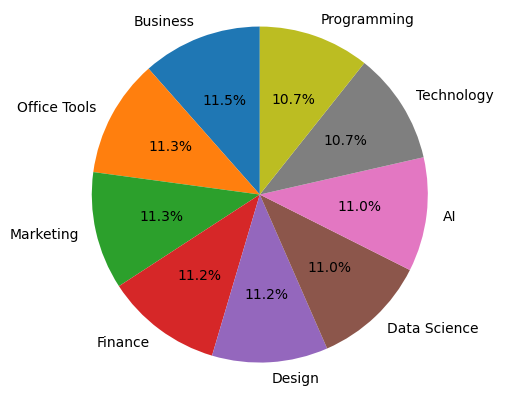

In [97]:
category_counts = df['Category'].value_counts()

fig, ax = plt.subplots()
ax.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

plt.show()

<Axes: xlabel='Price ($)', ylabel='Count'>

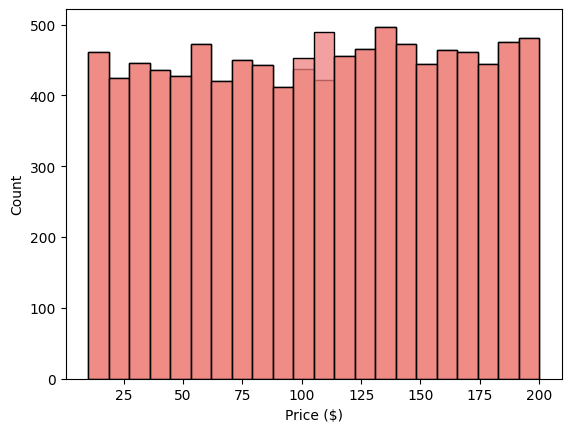

In [109]:

sns.histplot(data=df, x="Price ($)", color = "darksalmon")
sns.histplot(data=df, x="Price_mean", color="lightcoral")

<Axes: xlabel='Price ($)', ylabel='Category'>

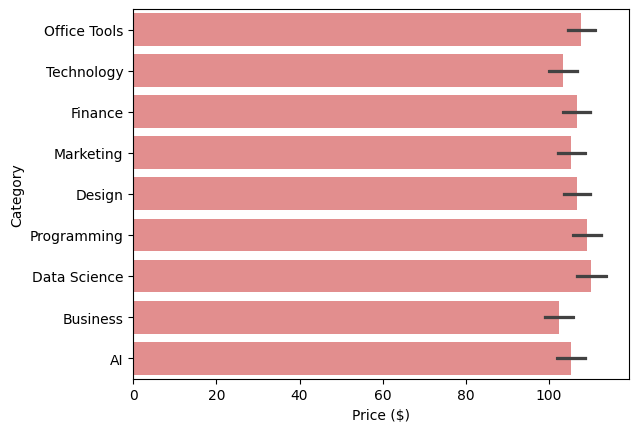

In [112]:
sns.barplot(data=df, x="Price ($)", y="Category", color = "blue")
sns.barplot(data=df, x="Price_mean", y = "Category", color="lightcoral")

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Office Tools'),
  Text(1, 0, 'Technology'),
  Text(2, 0, 'Finance'),
  Text(3, 0, 'Marketing'),
  Text(4, 0, 'Design'),
  Text(5, 0, 'Programming'),
  Text(6, 0, 'Data Science'),
  Text(7, 0, 'Business'),
  Text(8, 0, 'AI')])

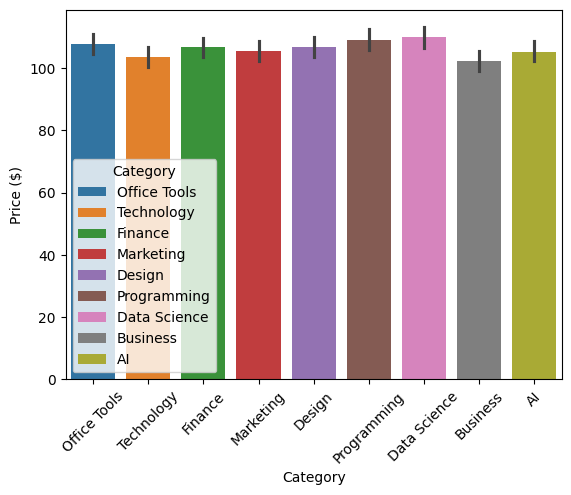

In [89]:
sns.barplot(data=df, x="Category", y="Price ($)", hue="Category")
plt.xticks(rotation = 45)

In [113]:
df

,Unnamed: 0,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5),...,Price_mean,Price_median,CompletionRate_mean,CompletionRate_median,Enrolled_mean,Enrolled_median,DurationHour_mean,DurationHour_median,Platform_mode,Platform_mean(Price)
0,0,1.0,Course_1,Office Tools,21.0,4217.0,50.646827,Coursera,38.797425,4.811252,...,38.797425,38.797425,50.646827,50.646827,4217.0,4217.0,21.0,21.0,Coursera,Coursera
1,1,2.0,Course_2,Office Tools,57.0,4238.0,82.240240,edX,160.650991,3.829329,...,160.650991,160.650991,82.240240,82.240240,4238.0,4238.0,57.0,57.0,edX,edX
2,2,3.0,Course_3,Technology,52.0,2700.0,55.729028,LinkedIn Learning,123.503781,4.851950,...,123.503781,123.503781,55.729028,55.729028,2700.0,2700.0,52.0,52.0,LinkedIn Learning,LinkedIn Learning
3,3,NaN,Course_4,Office Tools,69.0,4308.0,58.664729,LinkedIn Learning,116.775704,3.913732,...,116.775704,116.775704,58.664729,58.664729,4308.0,4308.0,69.0,69.0,LinkedIn Learning,LinkedIn Learning
4,4,5.0,Course_5,Technology,43.0,4792.0,62.598147,Udemy,96.246696,4.921968,...,96.246696,96.246696,62.598147,62.598147,4792.0,4792.0,43.0,43.0,Udemy,Udemy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,NaN,Course_9996,AI,87.0,482.0,55.407463,Udemy,155.965331,4.155649,...,155.965331,155.965331,55.407463,55.407463,482.0,482.0,87.0,87.0,Udemy,Udemy
9996,9996,9997.0,Course_9997,Data Science,96.0,2029.0,93.093483,Coursera,151.022434,4.037755,...,151.022434,151.022434,93.093483,93.093483,2029.0,2029.0,96.0,96.0,Coursera,Coursera
9997,9997,9998.0,Course_9998,AI,25.0,136.0,90.279510,LinkedIn Learning,101.155089,3.603868,...,101.155089,101.155089,90.279510,90.279510,136.0,136.0,25.0,25.0,LinkedIn Learning,LinkedIn Learning
9998,9998,9999.0,Course_9999,NaN,46.0,3258.0,73.720149,edX,101.143232,3.825781,...,101.143232,101.143232,73.720149,73.720149,3258.0,3258.0,46.0,46.0,edX,edX


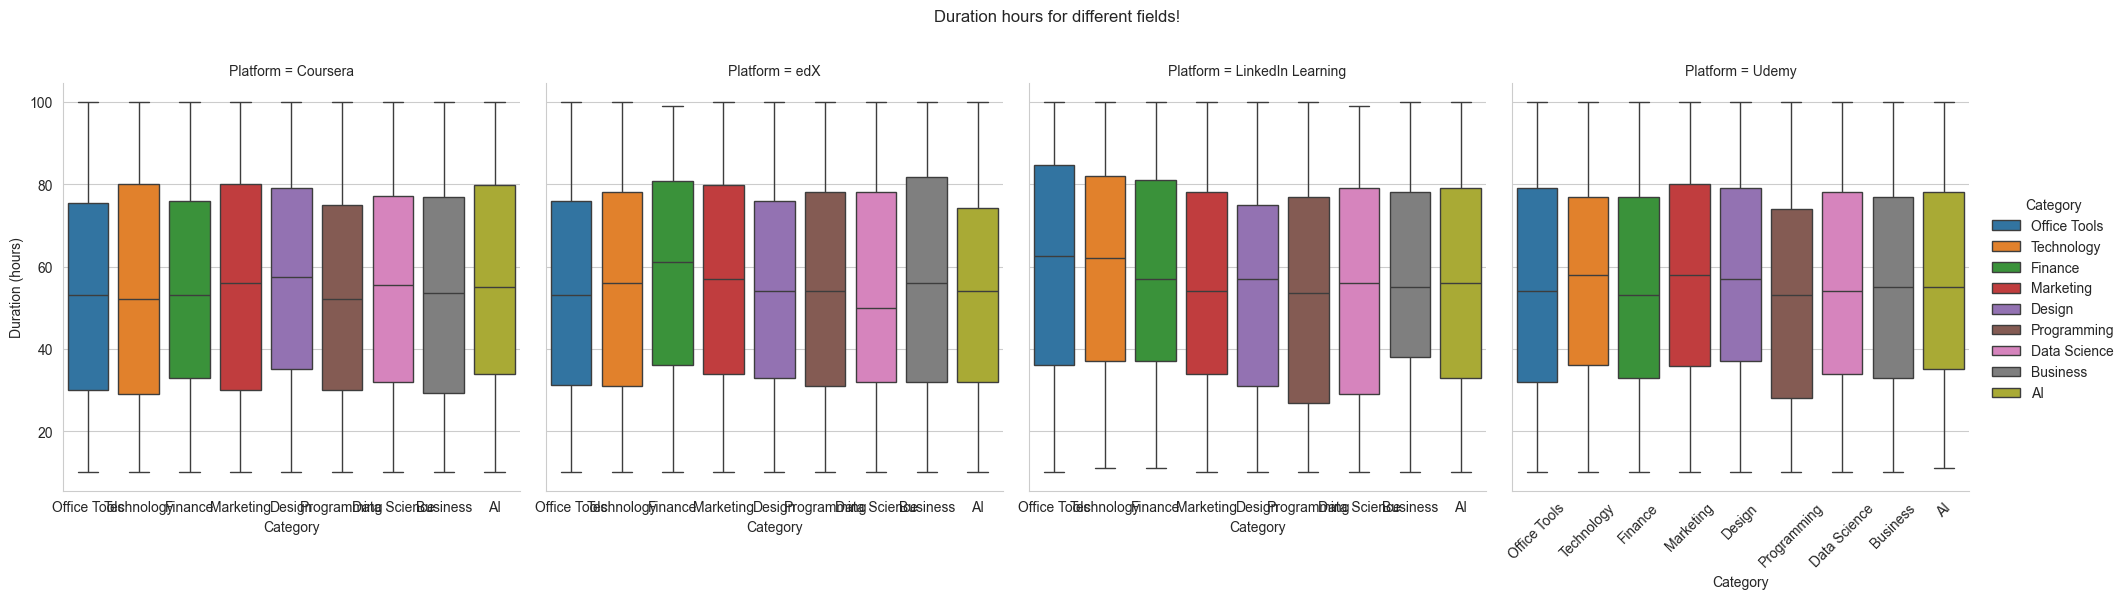

In [121]:
sns.set_style("whitegrid")

g = sns.catplot(x="Category", y="Duration (hours)",data=df, hue="Category", kind="box", col="Platform")
g.figure.suptitle("Duration hours for different fields!", y=1.08)

plt.xticks(rotation = 45)
plt.show()

/var/folders/66/x0152m9s4fxg2fz8tfrrqlc80000gp/T/ipykernel_9754/745034181.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/66/x0152m9s4fxg2fz8tfrrqlc80000gp/T/ipykernel_9754/745034181.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


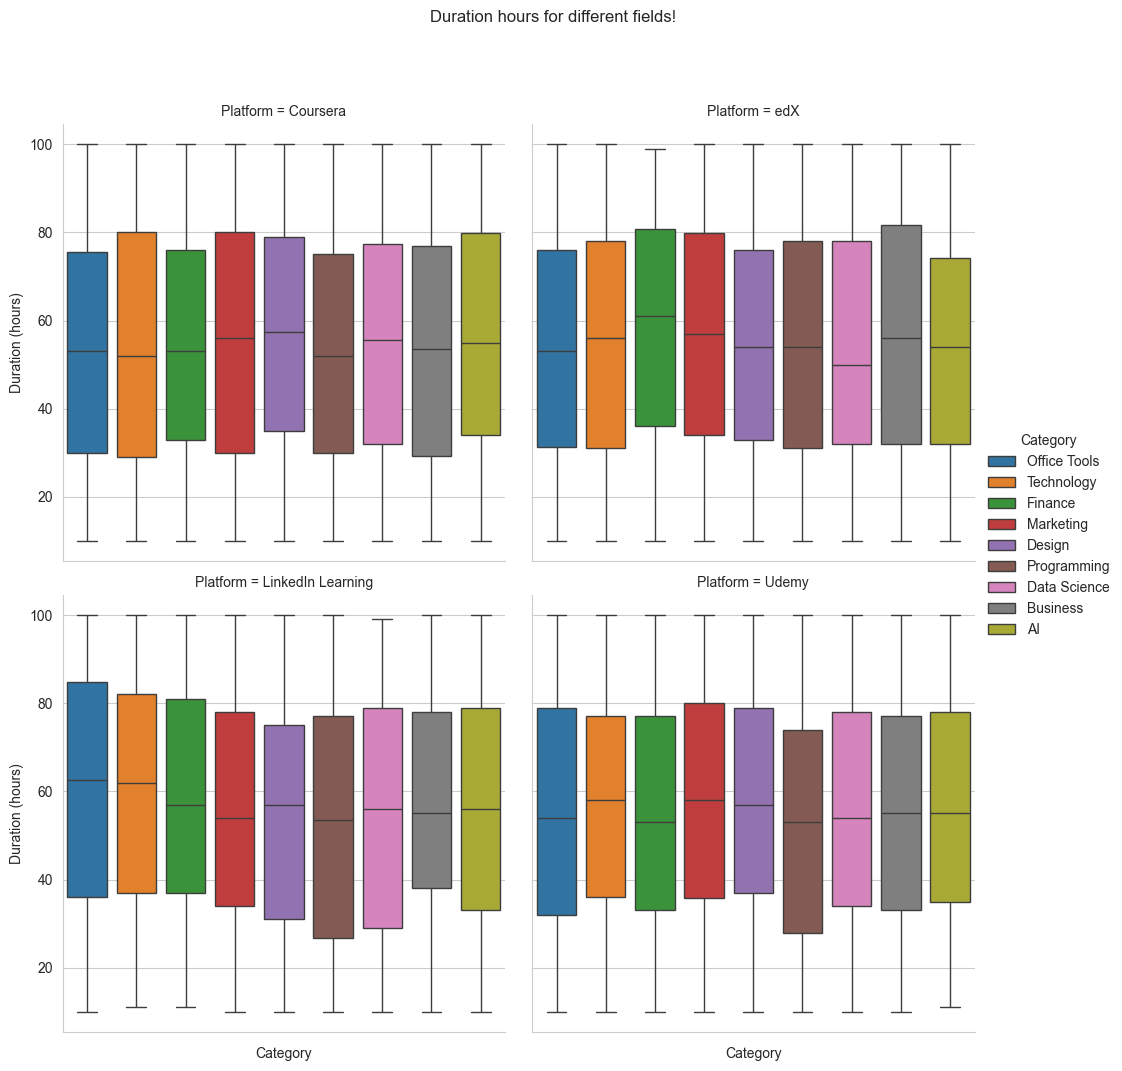

In [122]:
# Your DataFrame `df` should be defined here

sns.set_style("whitegrid")

# Create the catplot with the desired layout
g = sns.catplot(x="Category", y="Duration (hours)", data=df, hue="Category", kind="box", col="Platform", col_wrap=2)

# Set the overall title
g.fig.suptitle("Duration hours for different fields!", y=1.08)

# Rotate x-axis labels for each subplot
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Office Tools'),
  Text(1, 0, 'Technology'),
  Text(2, 0, 'Finance'),
  Text(3, 0, 'Marketing'),
  Text(4, 0, 'Design'),
  Text(5, 0, 'Programming'),
  Text(6, 0, 'Data Science'),
  Text(7, 0, 'Business'),
  Text(8, 0, 'AI')])

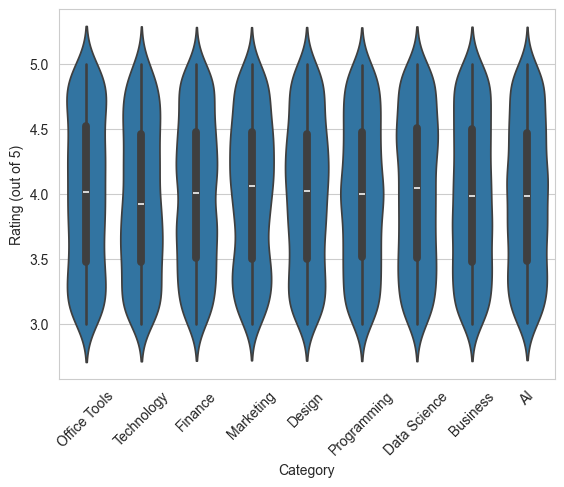

In [143]:
sns.violinplot(data=df, x="Category", y="Rating (out of 5)")
plt.xticks(rotation = 45)

In [127]:

le = LabelEncoder()
df["labeled_Category"] = le.fit_transform(df["Category"])
df["labeled_Platform"] = le.fit_transform(df["Platform"])
df

,Unnamed: 0,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5),...,CompletionRate_mean,CompletionRate_median,Enrolled_mean,Enrolled_median,DurationHour_mean,DurationHour_median,Platform_mode,Platform_mean(Price),labeled_Category,labeled_Platform
0,0,1.0,Course_1,Office Tools,21.0,4217.0,50.646827,Coursera,38.797425,4.811252,...,50.646827,50.646827,4217.0,4217.0,21.0,21.0,Coursera,Coursera,6,0
1,1,2.0,Course_2,Office Tools,57.0,4238.0,82.240240,edX,160.650991,3.829329,...,82.240240,82.240240,4238.0,4238.0,57.0,57.0,edX,edX,6,3
2,2,3.0,Course_3,Technology,52.0,2700.0,55.729028,LinkedIn Learning,123.503781,4.851950,...,55.729028,55.729028,2700.0,2700.0,52.0,52.0,LinkedIn Learning,LinkedIn Learning,8,1
3,3,NaN,Course_4,Office Tools,69.0,4308.0,58.664729,LinkedIn Learning,116.775704,3.913732,...,58.664729,58.664729,4308.0,4308.0,69.0,69.0,LinkedIn Learning,LinkedIn Learning,6,1
4,4,5.0,Course_5,Technology,43.0,4792.0,62.598147,Udemy,96.246696,4.921968,...,62.598147,62.598147,4792.0,4792.0,43.0,43.0,Udemy,Udemy,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,NaN,Course_9996,AI,87.0,482.0,55.407463,Udemy,155.965331,4.155649,...,55.407463,55.407463,482.0,482.0,87.0,87.0,Udemy,Udemy,0,2
9996,9996,9997.0,Course_9997,Data Science,96.0,2029.0,93.093483,Coursera,151.022434,4.037755,...,93.093483,93.093483,2029.0,2029.0,96.0,96.0,Coursera,Coursera,2,0
9997,9997,9998.0,Course_9998,AI,25.0,136.0,90.279510,LinkedIn Learning,101.155089,3.603868,...,90.279510,90.279510,136.0,136.0,25.0,25.0,LinkedIn Learning,LinkedIn Learning,0,1
9998,9998,9999.0,Course_9999,NaN,46.0,3258.0,73.720149,edX,101.143232,3.825781,...,73.720149,73.720149,3258.0,3258.0,46.0,46.0,edX,edX,9,3


<Axes: xlabel='Enrolled_Students', ylabel='Category'>

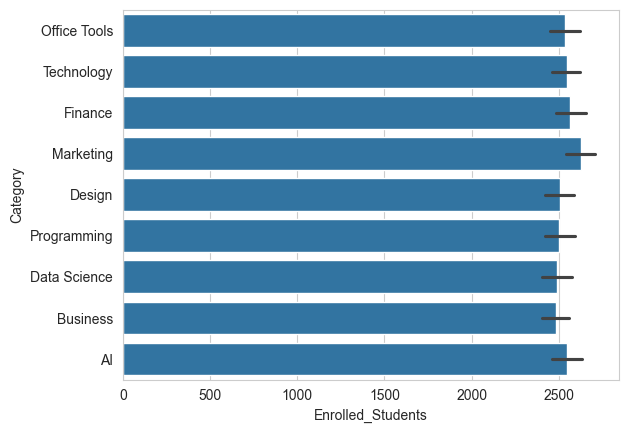

In [135]:
sns.barplot(data=df, y="Category", x="Enrolled_Students")

<Axes: xlabel='Enrolled_Students', ylabel='Completion_Rate (%)'>

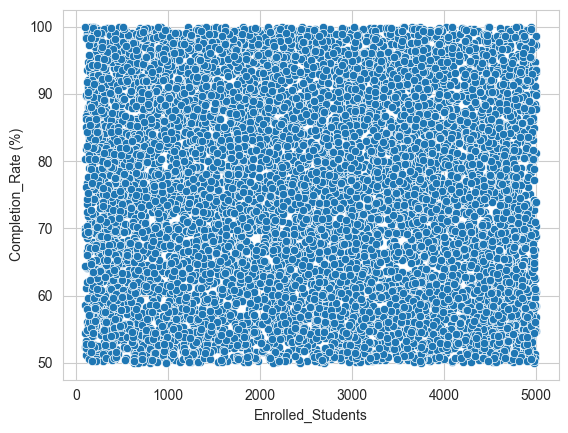

In [137]:
sns.scatterplot(data=df, x="Enrolled_Students", y="Completion_Rate (%)")
